<a href="https://colab.research.google.com/github/ParvathiSant/project/blob/main/Startups_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
df=pd.read_csv("/content/50_Startups.csv")

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

<AxesSubplot:>

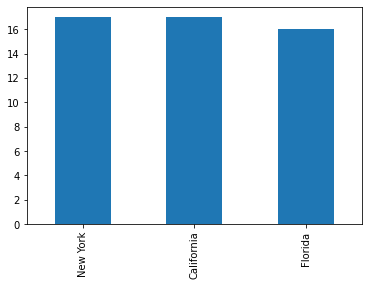

In [22]:
df.State.value_counts().plot.bar()

In [9]:
x=df.iloc[:,:4]

In [10]:
y=df.iloc[:,4]

<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>

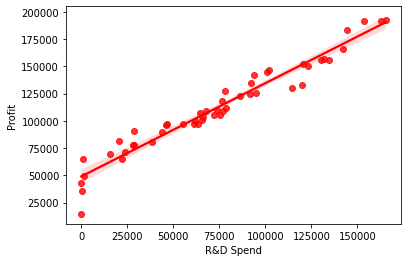

In [11]:
sns.regplot(x=df['R&D Spend'],y=y,color='red')

<AxesSubplot:xlabel='Marketing Spend', ylabel='Profit'>

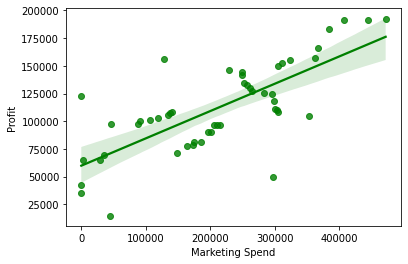

In [12]:
sns.regplot(x=df['Marketing Spend'],y=y,color='green')

<AxesSubplot:xlabel='Administration', ylabel='Profit'>

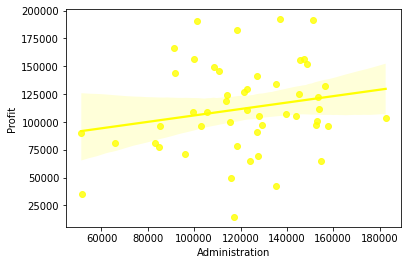

In [13]:
sns.regplot(x=df['Administration'],y=y,color='yellow')

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
col_transfer=make_column_transformer((OneHotEncoder(handle_unknown='ignore'),['State']),remainder='passthrough')
x=col_transfer.fit_transform(x)
x

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
x_train

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.3640930e+04,
        9.6189630e+04, 1.4800111e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.1698380e+05, 4.5173060e+04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 7.5328870e+04,
        1.4413598e+05, 1.3405007e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 7.3994560e+04,
        1.2278275e+05, 3.0331926e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.1992390e+04,
        1.3549507e+05, 2.5266493e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 2.7892920e+04,
        8.4710770e+04, 1.6447071e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 9.4657160e+04,
        1.4507758e+05, 2.8257431e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.0002300e+03,
        1.2415304e+05, 1.9039300e+03],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 7.7044010e+04,
        9.9281340e+04, 1.4057481e+05],
       [0.0000000e+00, 1.0000000e+00,

In [16]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
y_pred

array([115325.09875888,  90638.08603376,  76019.13126601,  70325.43761815,
       179659.7398274 , 172204.16410706,  48850.65280981, 101321.43054263,
        58316.95833315,  97217.64504548,  98129.20007849,  84156.44747448,
       117923.69116313,  75866.34008182, 113595.93339165])

In [17]:
df1=pd.DataFrame({'actual_value':y_test,'predicted_value':y_pred,'Difference':y_test-y_pred})
df1

,actual_value,predicted_value,Difference
27,105008.31,115325.098759,-10316.788759
35,96479.51,90638.086034,5841.423966
40,78239.91,76019.131266,2220.778734
38,81229.06,70325.437618,10903.622382
2,191050.39,179659.739827,11390.650173
3,182901.99,172204.164107,10697.825893
48,35673.41,48850.652810,-13177.242810
29,101004.64,101321.430543,-316.790543
46,49490.75,58316.958333,-8826.208333
31,97483.56,97217.645045,265.914955


In [18]:
from sklearn.metrics import mean_absolute_error
print('MAE',mean_absolute_error(y_test,y_pred))

MAE 7229.516119284178


In [19]:
from sklearn.metrics import mean_absolute_percentage_error
print('MAPE',mean_absolute_percentage_error(y_test,y_pred))

MAPE 0.08913280081237054


In [21]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print('mse=',mse)
print('rmse=',rmse)


mse= 74598131.69470714
rmse= 8637.020996541987
